## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [89]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [90]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [91]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [92]:
print('Shape of X Array: ', X.shape)
print('Shape of y Array: ', y.shape)

Shape of X Array:  (50,)
Shape of y Array:  (50,)


### Plot X vs. y

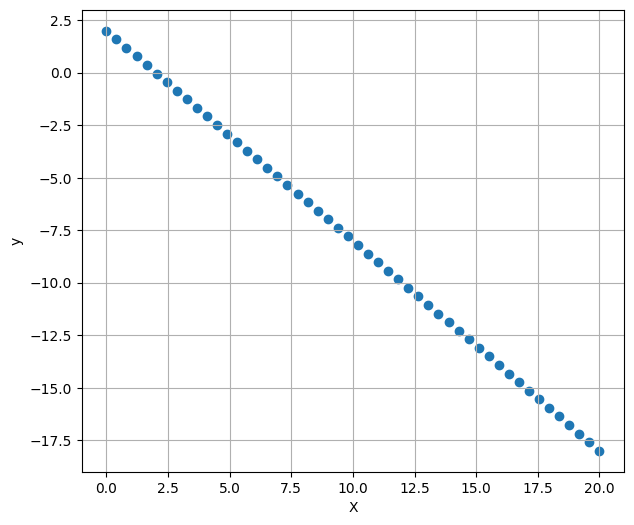

In [93]:
plt.figure(figsize=(7, 6))
plt.scatter(X, y)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [94]:
def batch_gd(x: np.array, y: np.array, alpha: float, max_iterations: int) -> tuple:
    '''
    A Function to apply linear regression on multivariant data using vanilla gradient descent.
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improvement in the cost).

    Args:
        x (np.array): Input feature with shape (m, n), where m is the number of observations and n is the number of features.
        y (np.array): Target value with shape (m, 1), where m is the number of observations.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_values, training_loss, y_predict, theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters) as well as training loss per epoch.
    '''

    # Check the input parameters
    assert x.shape[0] == y.shape[0], "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    m, n = x.shape[0], x.shape[1]     # Get number of observations => m , number of features/variables => n


    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = []          # List to store the training loss
    theta_values = [[], []]           # List to store the theta values

    ones_column = np.ones(shape=(m, 1))       # Initialize the ones column to be added to the x samples
    x_new = np.concatenate((ones_column, x), axis=1)
    thetas = np.zeros(shape=(n+1, 1))    # Initialize the model parameters



    # Training Loop
    for iteration in range(max_iterations):

        print(f"\n****************** Iteration {iteration} ********************")


        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = x_new @ thetas
        print('\nPredicted Variable h(x):', y_predict)


        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * m)
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)

        # Append the loss
        training_loss.append(cost)

        # Append the theta values
        print(thetas[0], thetas[1])
        theta_values[0].append(thetas[0].flatten())
        theta_values[1].append(thetas[1].flatten())


        # Get the gradient components
        thetas_gradient = (x_new.T @ error) / m


        # Get the gradient vector & its norm
        gradient_norm = np.linalg.norm(thetas_gradient)
        print('\nGradient Vector:\n', thetas_gradient)
        print('\nGradient Vector Norm: ', gradient_norm)


        # If the cost doesn't get improved noticeably or the gradient gets updated slowly (vanishing gradient) then exit the training
        theta_new = thetas - (alpha * thetas_gradient)
        new_cost = np.sum(((x_new @ theta_new) - y) ** 2) / (2 * m)
        if ((cost - new_cost) < 0.001) or (gradient_norm < 0.001):
            break


        # Update parameters
        thetas -= alpha * thetas_gradient
        print('\ntheta_new: ', thetas)



    # Get the training report
    print("\n****************** Training Report ********************")


    print(f"\nGradient Descent converged after {iteration+1} epochs")
    print('theta_0_Opt: ', thetas[0].flatten())
    print('theta_1_Opt: ', thetas[1].flatten())

    y_predict = x_new @ theta_new
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y) ** 2) / (2 * m))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)


    return theta_values, training_loss, y_predict, thetas[0], thetas[1]

In [95]:
def plot_loss_per_epoch(training_loss):
  plt.figure(figsize=(7, 6))
  plt.plot(range(len(training_loss)), training_loss, color='m', marker='o')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

In [96]:
def loss_per_theta_0(theta_0_values, training_loss, lr):
  plt.figure(figsize=(7, 6))
  plt.plot(theta_0_values, training_loss, color='m', marker='o')
  plt.grid()
  plt.title(f'Learning Rate = {lr}')
  plt.xlabel('Theta 0')
  plt.ylabel('Loss')
  plt.show()

In [97]:
def loss_per_theta_1(theta_1_values, training_loss, lr):
  plt.figure(figsize=(7, 6))
  plt.plot(theta_1_values, training_loss, color='m', marker='o')
  plt.grid()
  plt.title(f'Learning Rate = {lr}')
  plt.xlabel('Theta 1')
  plt.ylabel('Loss')
  plt.show()

In [98]:
def all_regression_lines(x, y, theta_0_values, theta_1_values):
  plt.figure(figsize=(7, 6))
  plt.grid()
  plt.xlabel('X')
  plt.ylabel('y')

  for theta_0, theta_1 in zip(theta_0_values, theta_1_values):
    y_pred = theta_0 + theta_1 * x
    plt.plot(x, y_pred, color='r')

  plt.scatter(x, y)
  plt.show()

In [99]:
def compare_outpot(x, y, y_predict):
  plt.figure(figsize=(7, 6))
  plt.grid()
  plt.xlabel('X')
  plt.ylabel('y')
  plt.plot(x, y_predict, color='r')
  plt.scatter(x, y)
  plt.show()

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [100]:
theta_values, training_loss, y_predict, theta_0, theta_1 = batch_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, max_iterations=300)

Streaming output truncated to the last 5000 lines.
 [-0.6897017 ]]

****************** Iteration 24 ********************

Predicted Variable h(x): [[ -0.04493556]
 [ -0.32644646]
 [ -0.60795736]
 [ -0.88946826]
 [ -1.17097916]
 [ -1.45249006]
 [ -1.73400096]
 [ -2.01551186]
 [ -2.29702276]
 [ -2.57853366]
 [ -2.86004456]
 [ -3.14155546]
 [ -3.42306636]
 [ -3.70457726]
 [ -3.98608816]
 [ -4.26759906]
 [ -4.54910996]
 [ -4.83062085]
 [ -5.11213175]
 [ -5.39364265]
 [ -5.67515355]
 [ -5.95666445]
 [ -6.23817535]
 [ -6.51968625]
 [ -6.80119715]
 [ -7.08270805]
 [ -7.36421895]
 [ -7.64572985]
 [ -7.92724075]
 [ -8.20875165]
 [ -8.49026255]
 [ -8.77177345]
 [ -9.05328435]
 [ -9.33479525]
 [ -9.61630615]
 [ -9.89781705]
 [-10.17932795]
 [-10.46083885]
 [-10.74234975]
 [-11.02386065]
 [-11.30537155]
 [-11.58688245]
 [-11.86839335]
 [-12.14990425]
 [-12.43141515]
 [-12.71292605]
 [-12.99443695]
 [-13.27594785]
 [-13.55745875]
 [-13.83896965]]

Error Vector:
 [[-2.04493556]
 [-1.91828319]
 [-1.7

In [101]:
y_predict = theta_0 + theta_1 * X
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9685612861091611


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

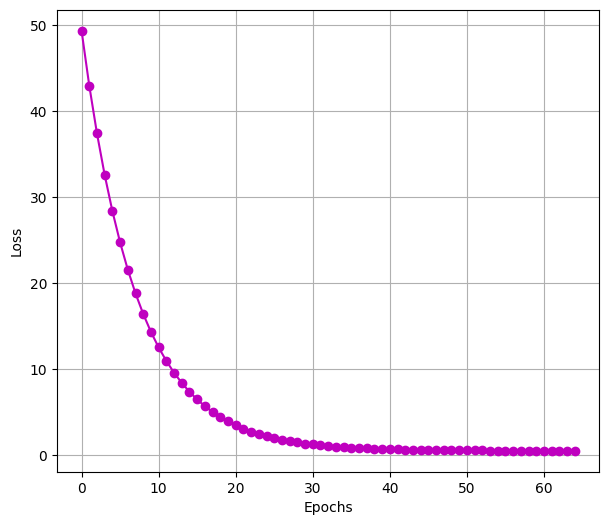

In [102]:
plot_loss_per_epoch(training_loss)

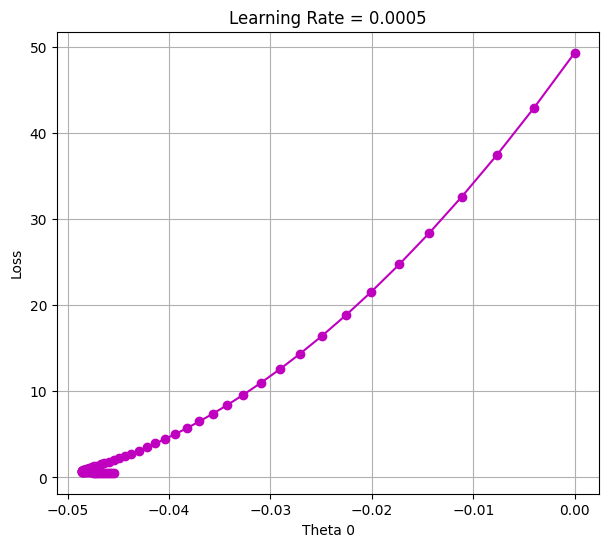

In [103]:
loss_per_theta_0(theta_values[0], training_loss, 0.0005)

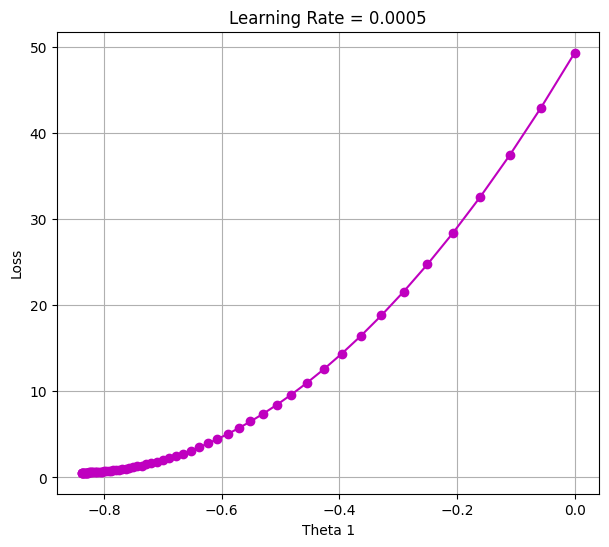

In [104]:
loss_per_theta_1(theta_values[1], training_loss, 0.0005)

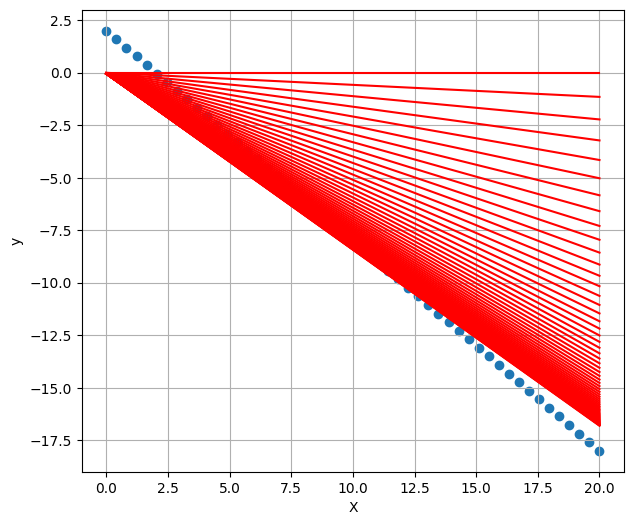

In [105]:
all_regression_lines(X, y, theta_values[0], theta_values[1])

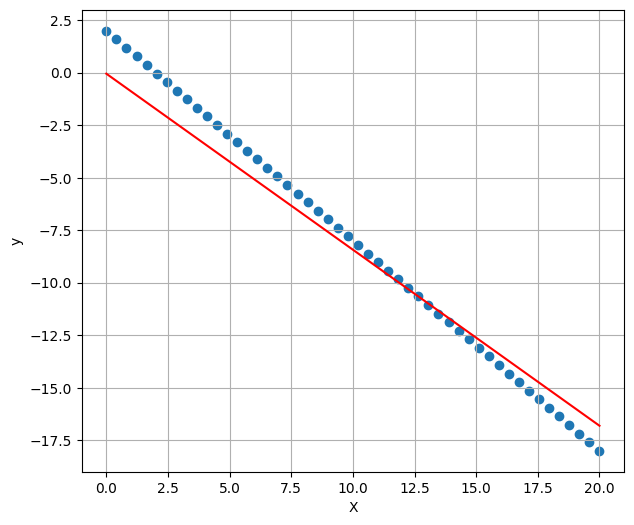

In [106]:
compare_outpot(X, y, y_predict)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [107]:
def momentum_gd(x: np.array, y: np.array, alpha: float, gamma: float, max_iterations: int) -> tuple:
    '''
    A Function to apply Momentum Based Batch Gradient Descent on multivariant data, where m is the number of observations and n is the number of features.
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improve in the cost).

    Args:
        x (np.array): Input feature with shape (m, n), where m is the number of observations and n is the number of features.
        y (np.array): Target value with shape (m, 1), where m is the number of observations.
        alpha (float): Learning rate.
        gamma (float): The momentum.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_values, training_loss, y_predict, theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters) as well as training loss per epoch.
    '''

     # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."


    m, n = x.shape[0], x.shape[1]     # Get number of observations => m , number of features/variables => n

    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = []          # List to store the training loss
    theta_values = [[], []]           # List to store the theta values

    ones_column = np.ones(shape=(m, 1))       # Initialize the ones column to be added to the x samples
    x_new = np.concatenate((ones_column, x), axis=1)    # Update the x data

    thetas = np.zeros(shape=(n+1, 1))    # Initialize the model parameters
    v = np.zeros(shape=(n+1, 1))         # Initialize the momentum terms


    # Training Loop
    for iteration in range(max_iterations):

        print(f"\n****************** Iteration {iteration} ********************")

        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = x_new @ thetas
        print('\nPredicted Variable h(x):', y_predict)


        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * m)
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)


        # Append the loss of the current epoch
        training_loss.append(cost)


        # Append the theta values
        theta_values[0].append(thetas[0].flatten())
        theta_values[1].append(thetas[1].flatten())


        # Get the gradient components
        thetas_gradient = (x_new.T @ error) / m


        # Get the gradient vector & its norm
        gradient_norm = np.linalg.norm(thetas_gradient)
        print('\nGradient Vector:\n', thetas_gradient)
        print('\nGradient Vector Norm: ', gradient_norm)

        # Get the momentum terms
        v = (gamma * v) + (alpha * thetas_gradient)
        print('\nv_0: ', v[0].flatten())
        print('\nv_1: ', v[1].flatten())



        # If the cost doesn't get improved noticeably or the gradient gets updated slowly (vanishing gradient) then exit the training
        thetas_new = thetas - v
        y_pred = x_new @ thetas_new
        new_cost = np.sum((y_pred - y) ** 2) / (2 * m)
        if (abs(cost - new_cost) < 0.001) or (gradient_norm < 0.001):
            break


        # Update parameters
        thetas -= v
        print('\ntheta_0_new: ', thetas[0].flatten())
        print('theta_1_new: ', thetas[1].flatten())



    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {iteration+1} epochs")
    print('theta_0_Opt: ', thetas[0].flatten())
    print('theta_1_Opt: ', thetas[1].flatten())

    y_predict = x_new @ thetas
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y) ** 2) / (2 * m))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)


    return theta_values, training_loss, y_predict, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [108]:
theta_values, training_loss, y_predict, theta_0, theta_1 = momentum_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, gamma=0.5, max_iterations=300)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
 [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14

In [109]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9687370172346129


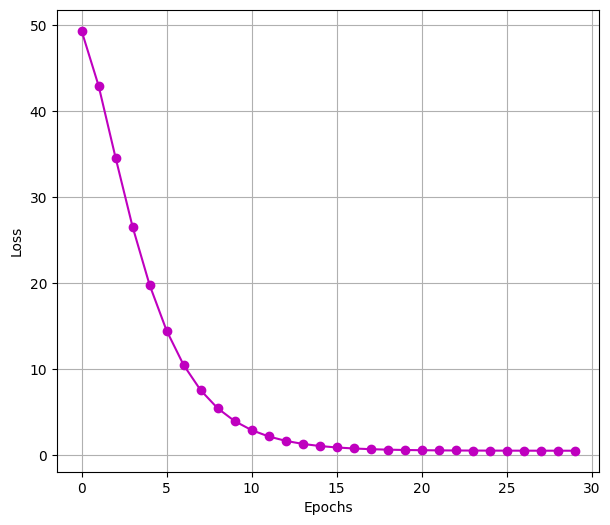

In [110]:
plot_loss_per_epoch(training_loss)

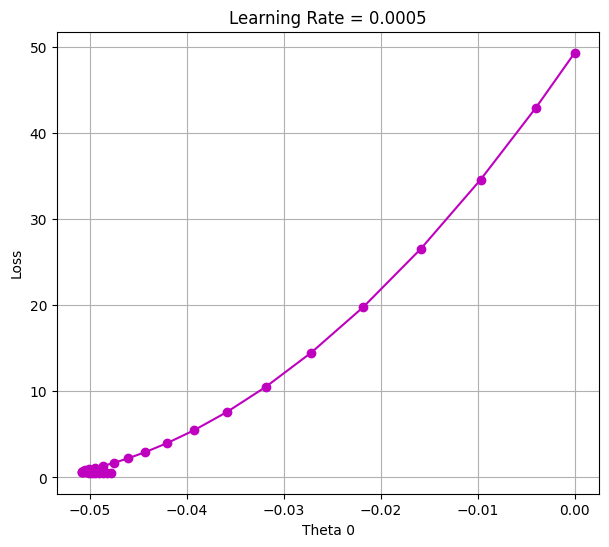

In [111]:
loss_per_theta_0(theta_values[0], training_loss, 0.0005)

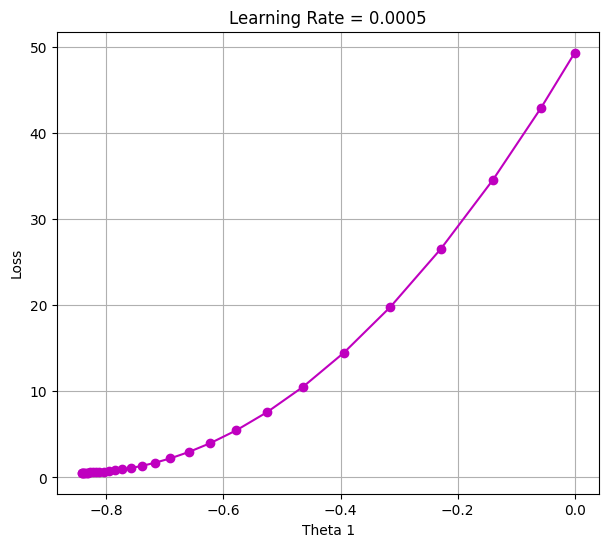

In [112]:
loss_per_theta_1(theta_values[1], training_loss, 0.0005)

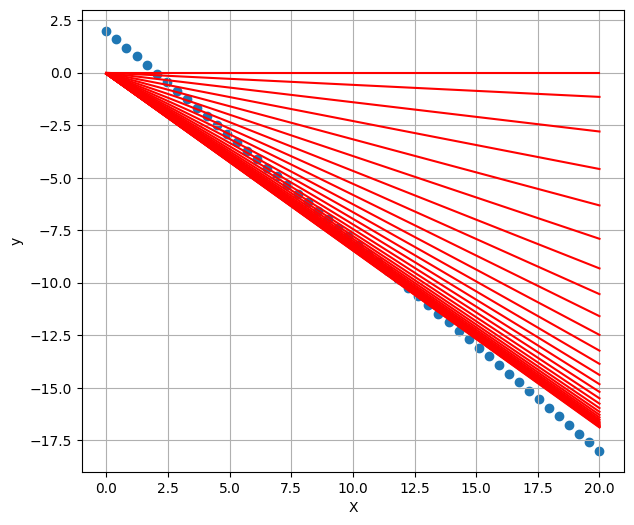

In [113]:
all_regression_lines(X, y, theta_values[0], theta_values[1])

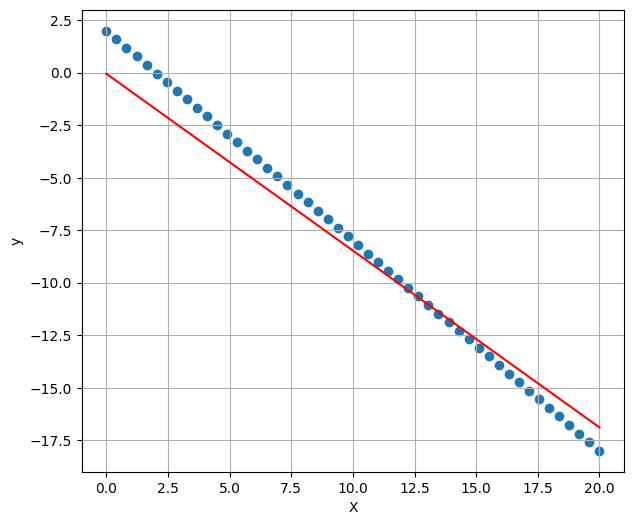

In [114]:
compare_outpot(X, y, y_predict)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [115]:
theta_values, training_loss, y_predict, theta_0, theta_1 = momentum_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, gamma=0.9, max_iterations=300)

Streaming output truncated to the last 5000 lines.
****************** Iteration 39 ********************

Predicted Variable h(x): [[ 9.82046473e-03]
 [-3.70434016e-01]
 [-7.50688496e-01]
 [-1.13094298e+00]
 [-1.51119746e+00]
 [-1.89145194e+00]
 [-2.27170642e+00]
 [-2.65196090e+00]
 [-3.03221538e+00]
 [-3.41246986e+00]
 [-3.79272434e+00]
 [-4.17297882e+00]
 [-4.55323330e+00]
 [-4.93348778e+00]
 [-5.31374226e+00]
 [-5.69399674e+00]
 [-6.07425122e+00]
 [-6.45450570e+00]
 [-6.83476018e+00]
 [-7.21501466e+00]
 [-7.59526914e+00]
 [-7.97552362e+00]
 [-8.35577810e+00]
 [-8.73603259e+00]
 [-9.11628707e+00]
 [-9.49654155e+00]
 [-9.87679603e+00]
 [-1.02570505e+01]
 [-1.06373050e+01]
 [-1.10175595e+01]
 [-1.13978139e+01]
 [-1.17780684e+01]
 [-1.21583229e+01]
 [-1.25385774e+01]
 [-1.29188319e+01]
 [-1.32990864e+01]
 [-1.36793408e+01]
 [-1.40595953e+01]
 [-1.44398498e+01]
 [-1.48201043e+01]
 [-1.52003588e+01]
 [-1.55806132e+01]
 [-1.59608677e+01]
 [-1.63411222e+01]
 [-1.67213767e+01]
 [-1.71016312e+

In [116]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9735685720204214


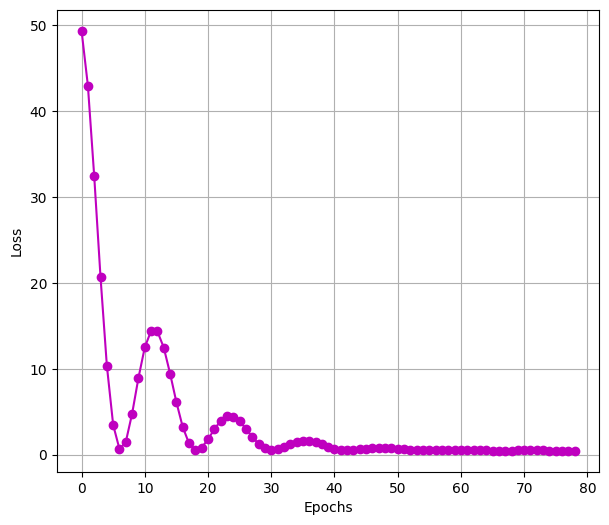

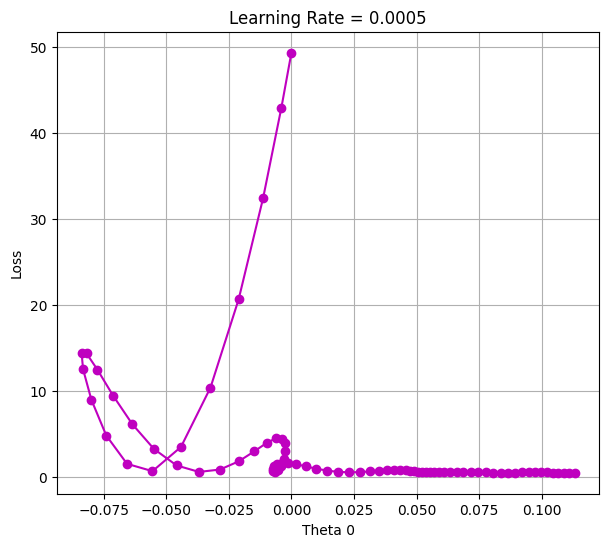

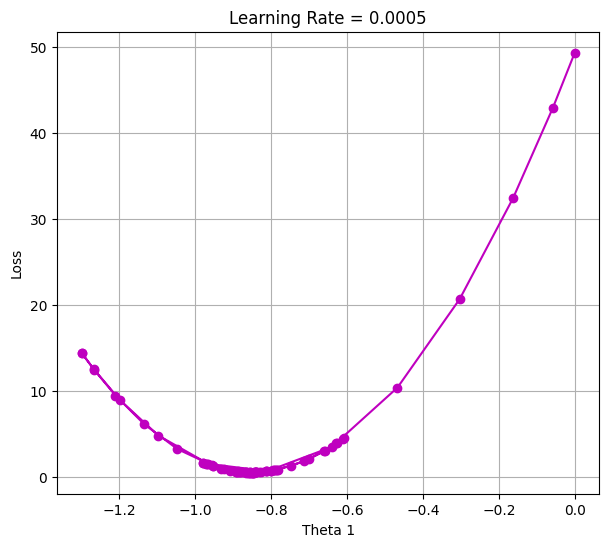

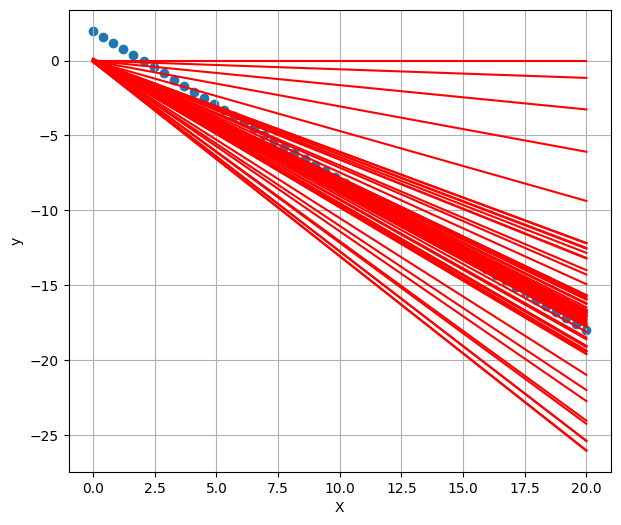

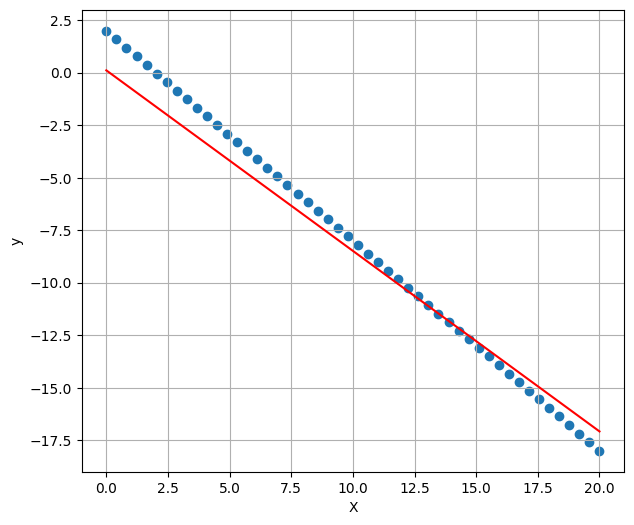

In [117]:
plot_loss_per_epoch(training_loss)
loss_per_theta_0(theta_values[0], training_loss, 0.0005)
loss_per_theta_1(theta_values[1], training_loss, 0.0005)
all_regression_lines(X, y, theta_values[0], theta_values[1])
compare_outpot(X, y, y_predict)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [118]:
theta_values, training_loss, y_predict, theta_0, theta_1 = momentum_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, gamma=0.89, max_iterations=300)

Streaming output truncated to the last 5000 lines.
****************** Iteration 27 ********************

Predicted Variable h(x): [[-7.08779466e-03]
 [-2.99542420e-01]
 [-5.91997046e-01]
 [-8.84451672e-01]
 [-1.17690630e+00]
 [-1.46936092e+00]
 [-1.76181555e+00]
 [-2.05427017e+00]
 [-2.34672480e+00]
 [-2.63917943e+00]
 [-2.93163405e+00]
 [-3.22408868e+00]
 [-3.51654330e+00]
 [-3.80899793e+00]
 [-4.10145256e+00]
 [-4.39390718e+00]
 [-4.68636181e+00]
 [-4.97881643e+00]
 [-5.27127106e+00]
 [-5.56372568e+00]
 [-5.85618031e+00]
 [-6.14863494e+00]
 [-6.44108956e+00]
 [-6.73354419e+00]
 [-7.02599881e+00]
 [-7.31845344e+00]
 [-7.61090806e+00]
 [-7.90336269e+00]
 [-8.19581732e+00]
 [-8.48827194e+00]
 [-8.78072657e+00]
 [-9.07318119e+00]
 [-9.36563582e+00]
 [-9.65809044e+00]
 [-9.95054507e+00]
 [-1.02429997e+01]
 [-1.05354543e+01]
 [-1.08279089e+01]
 [-1.11203636e+01]
 [-1.14128182e+01]
 [-1.17052728e+01]
 [-1.19977275e+01]
 [-1.22901821e+01]
 [-1.25826367e+01]
 [-1.28750913e+01]
 [-1.31675460e+

In [119]:
print('r2_score:', r2_score(y, y_predict))

r2_score: 0.9724150827372019


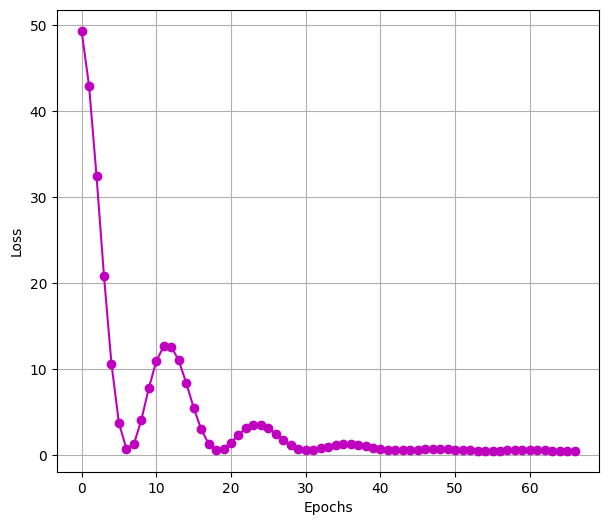

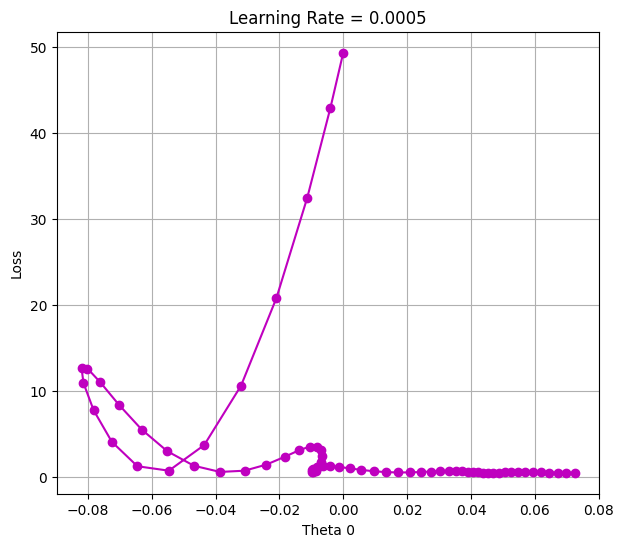

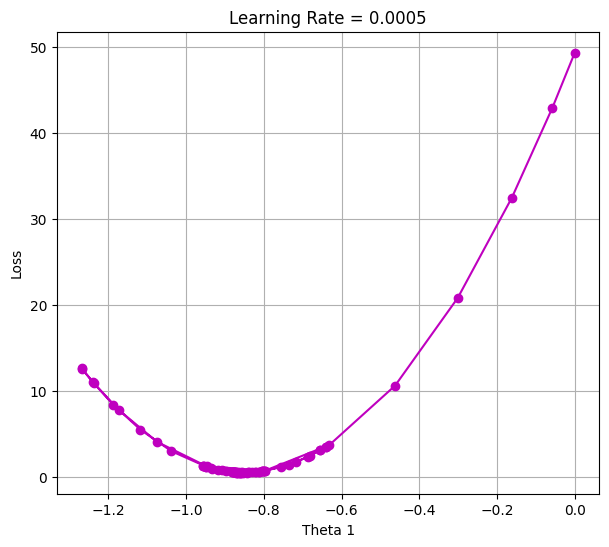

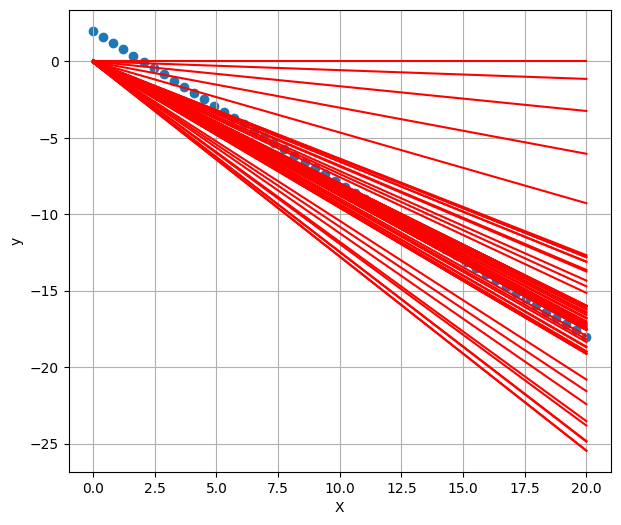

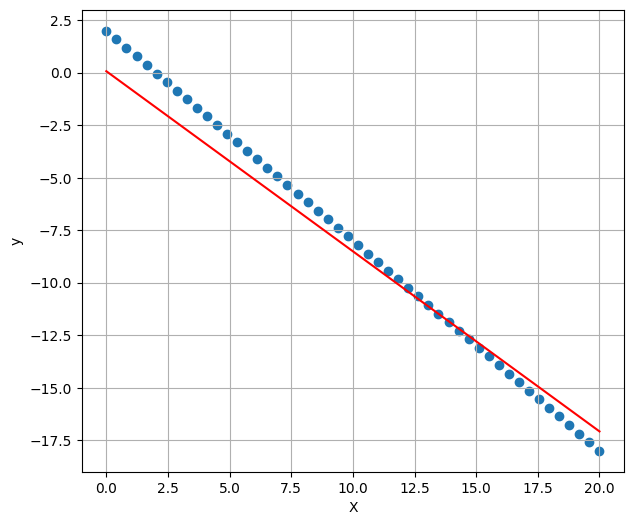

In [120]:
plot_loss_per_epoch(training_loss)
loss_per_theta_0(theta_values[0], training_loss, 0.0005)
loss_per_theta_1(theta_values[1], training_loss, 0.0005)
all_regression_lines(X, y, theta_values[0], theta_values[1])
compare_outpot(X, y, y_predict)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b>
##### h_temp = theta0_temp + theta1_temp * X

In [121]:
def nag_gd(x: np.array, y: np.array, alpha: float, gamma: float, max_iterations: int) -> tuple:
    '''
    A Function to apply Nestrov Accelerated Gradient Batch Based on multivariant data, where m is the number of observations and n is the number of features.
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improve in the cost).

    Args:
        x (np.array): Input feature with shape (m, n), where m is the number of observations and n is the number of features.
        y (np.array): Target value with shape (m, 1), where m is the number of observations.
        alpha (float): Learning rate.
        gamma (float): The momentum.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_values, training_loss, y_predict, theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters) as well as training loss per epoch.
    '''

    # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."


    m, n = x.shape[0], x.shape[1]     # Get number of observations => m , number of features/variables => n

    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = [0]          # List to store the training loss
    theta_values = [[], []]           # List to store the theta values

    ones_column = np.ones(shape=(m, 1))       # Initialize the ones column to be added to the x samples
    x_new = np.concatenate((ones_column, x), axis=1)    # Update the x data

    thetas = np.zeros(shape=(n+1, 1))    # Initialize the model parameters
    v = np.zeros(shape=(n+1, 1))         # Initialize the momentum terms


    # Training Loop
    for iteration in range(max_iterations):

        print(f"\n****************** Iteration {iteration} ********************")

        # Get the temporary theta value
        theta_temp = thetas - (gamma * v)


        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = x_new @ theta_temp
        print('\nPredicted Variable h(x):', y_predict)


        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * m)
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)


        # Append the loss of the current epoch
        training_loss.append(cost)


        # Append the theta temp values
        theta_values[0].append(theta_temp[0].flatten())
        theta_values[1].append(theta_temp[1].flatten())


        # Get the gradient components
        theta_temp_gradient = (x_new.T @ error) / m


        # Get the gradient vector & its norm
        gradient_norm = np.linalg.norm(theta_temp_gradient)
        print('\nGradient Vector:\n', theta_temp_gradient)
        print('\nGradient Vector Norm: ', gradient_norm)



        # If the cost doesn't get improved noticeably or the gradient gets updated slowly (vanishing gradient) then exit the training
        if (abs(training_loss[-2] - cost) < 0.001) or (gradient_norm < 0.001):
            break


        # Update parameters
        thetas = theta_temp - (alpha * theta_temp_gradient)
        print('\ntheta_0_new: ', thetas[0].flatten())
        print('theta_1_new: ', thetas[1].flatten())


        # Momentum Term Get the NAG terms
        v = (gamma * v) + (alpha * theta_temp_gradient)
        print('\nv_0: ', v[0].flatten())
        print('v_1: ', v[1].flatten())



    # Get the training report
    print("\n****************** Training Report ********************")

    # Remove last thetas used
    theta_values[0].pop()
    theta_values[1].pop()

    print(f"\nGradient Descent converged after {iteration+1} epochs")
    print('theta_0_Opt: ', thetas[0].flatten())
    print('theta_1_Opt: ', thetas[1].flatten())

    y_predict = x_new @ thetas
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y) ** 2) / (2 * m))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)



    return theta_values, training_loss[1:][:-1], y_predict, thetas[0].flatten(), thetas[1].flatten()

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [122]:
theta_values, training_loss, y_predict, theta_0, theta_1 = nag_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, gamma=0.9, max_iterations=300)

Streaming output truncated to the last 5000 lines.
 [ 3.51613238]
 [ 3.75719528]
 [ 3.99825819]
 [ 4.23932109]
 [ 4.48038399]
 [ 4.7214469 ]
 [ 4.9625098 ]
 [ 5.2035727 ]
 [ 5.44463561]
 [ 5.68569851]
 [ 5.92676141]
 [ 6.16782432]
 [ 6.40888722]
 [ 6.64995013]
 [ 6.89101303]
 [ 7.13207593]
 [ 7.37313884]
 [ 7.61420174]
 [ 7.85526464]
 [ 8.09632755]
 [ 8.33739045]
 [ 8.57845335]
 [ 8.81951626]
 [ 9.06057916]
 [ 9.30164207]
 [ 9.54270497]
 [ 9.78376787]]

Cost Function (J):
 13.569223870469164

Gradient Vector:
 [[ 3.87772673]
 [59.26761414]]

Gradient Vector Norm:  59.394333491733875

theta_0_new:  [-0.03025327]
theta_1_new:  [-0.43902969]

v_0:  [0.01011607]
v_1:  [0.14827552]

****************** Iteration 4 ********************

Predicted Variable h(x): [[ -0.03935774]
 [ -0.27302209]
 [ -0.50668644]
 [ -0.74035079]
 [ -0.97401514]
 [ -1.20767949]
 [ -1.44134384]
 [ -1.67500819]
 [ -1.90867254]
 [ -2.14233689]
 [ -2.37600124]
 [ -2.60966559]
 [ -2.84332994]
 [ -3.07699429]
 [ -3.31065

In [123]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9710487203543167


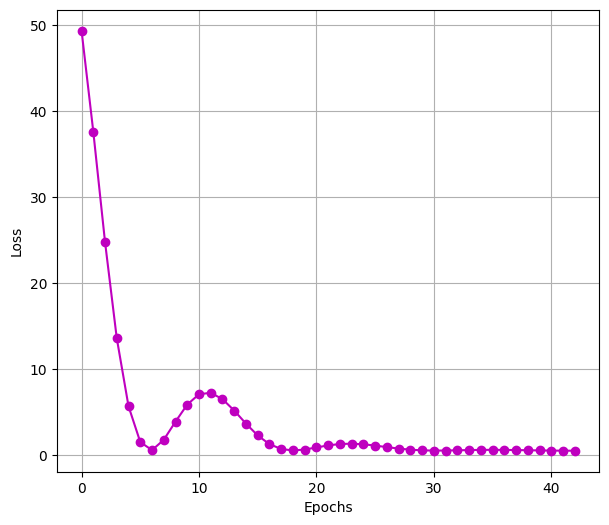

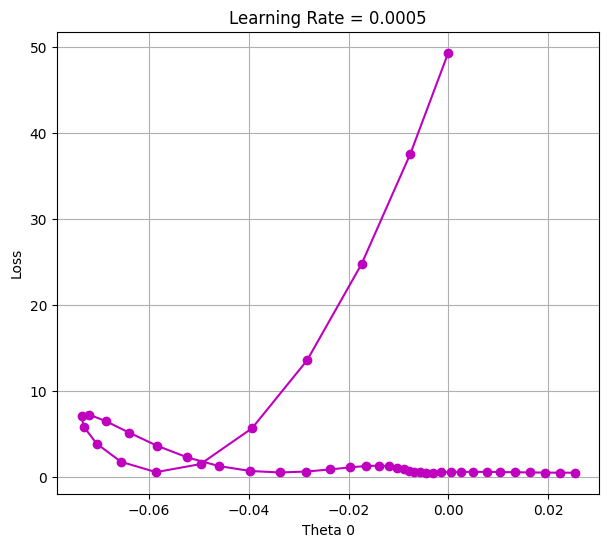

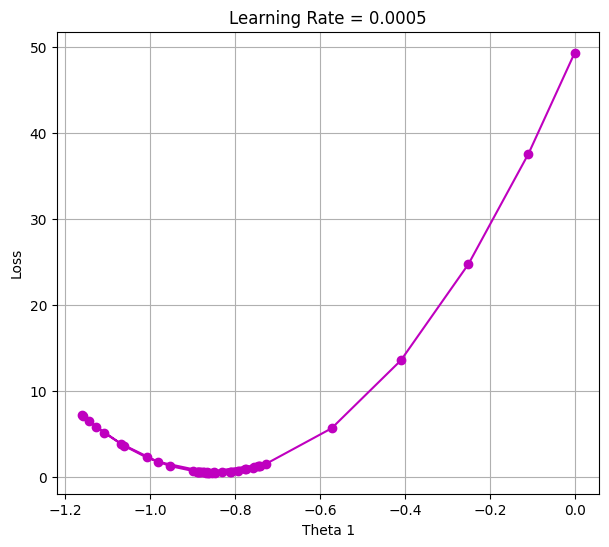

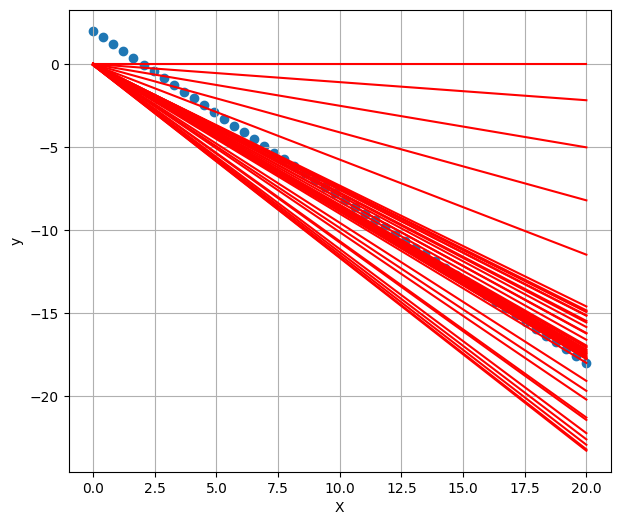

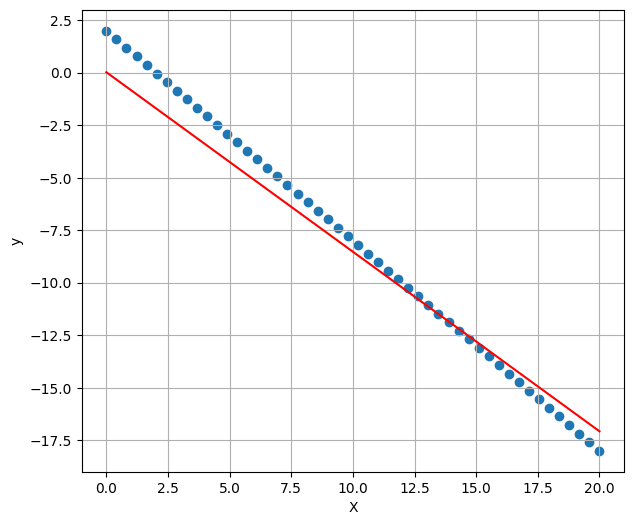

In [124]:
plot_loss_per_epoch(training_loss)
loss_per_theta_0(theta_values[0], training_loss, 0.0005)
loss_per_theta_1(theta_values[1], training_loss, 0.0005)
all_regression_lines(X, y, theta_values[0], theta_values[1])
compare_outpot(X, y, y_predict)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [125]:
theta_values, training_loss, y_predict, theta_0, theta_1 = nag_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, gamma=0.89, max_iterations=300)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
 [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14

In [126]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9699608922127444


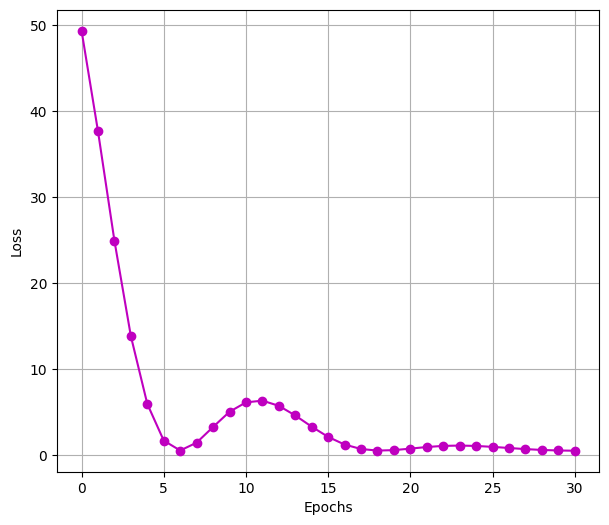

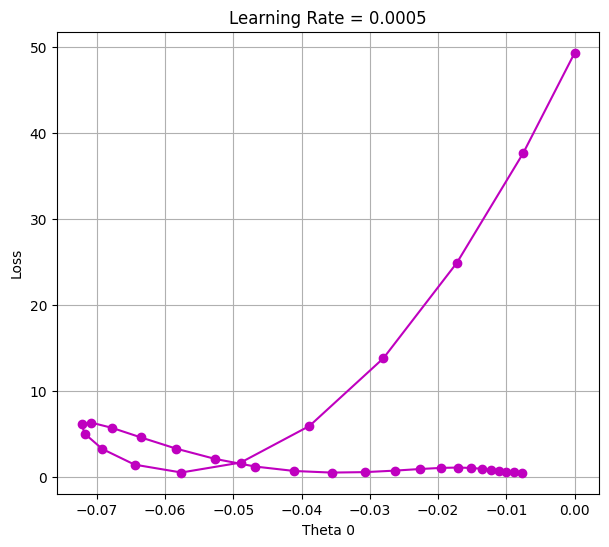

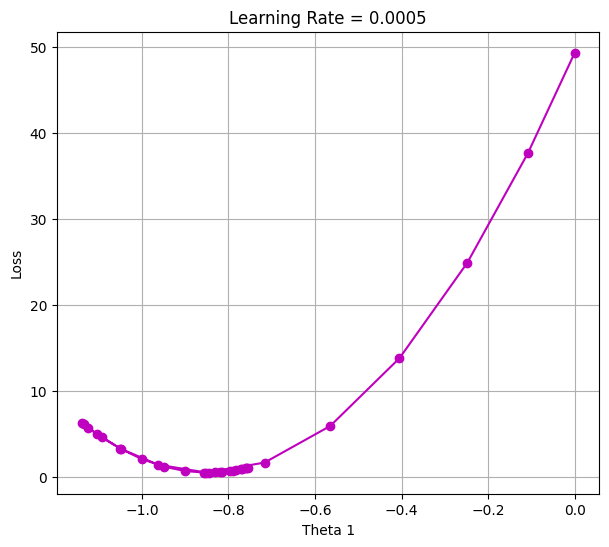

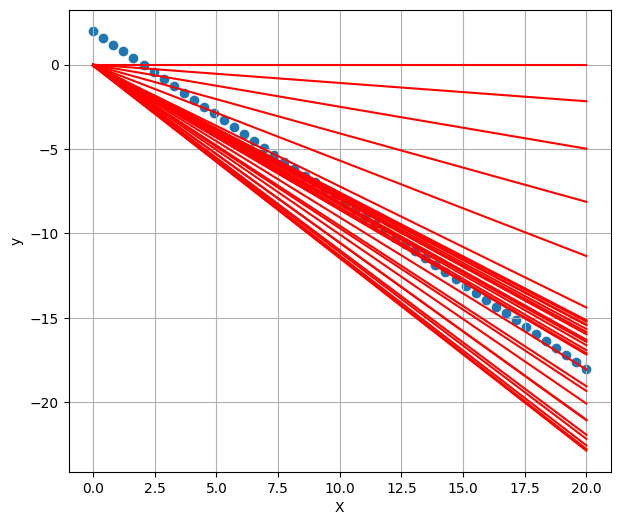

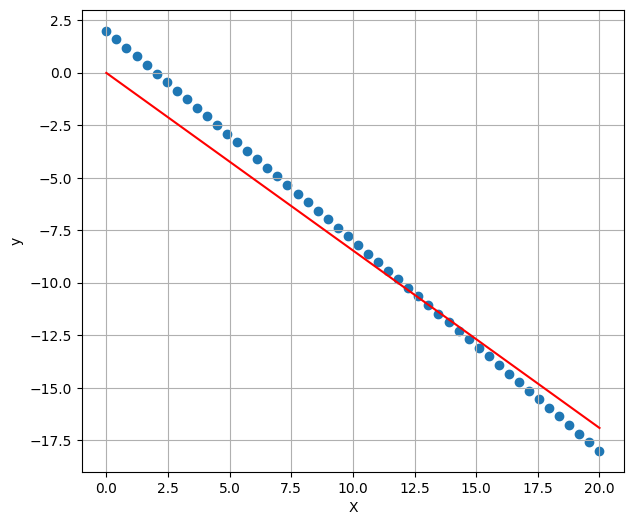

In [127]:
plot_loss_per_epoch(training_loss)
loss_per_theta_0(theta_values[0], training_loss, 0.0005)
loss_per_theta_1(theta_values[1], training_loss, 0.0005)
all_regression_lines(X, y, theta_values[0], theta_values[1])
compare_outpot(X, y, y_predict)